<a href="https://colab.research.google.com/github/ig-quinzel/Fake-News-Detection-using-Machine-Learning/blob/main/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:

# 📥 Load data
fakedata = pd.read_csv('Fake (1).csv')
truedata = pd.read_csv('True (1).csv')

In [ ]:
fakedata.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
truedata.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fakedata["class"] = 0   # 1 = Fake
truedata['class'] = 1  # 0 = True


In [ ]:
fakedata.shape, truedata.shape

((23481, 5), (21417, 5))

In [ ]:
data_fake_manual_testing=fakedata.tail(10)
for i in range(23480,23470,-1):
  fakedata.drop([i],axis=0,inplace=True)
data_true_manual_testing=truedata.tail(10)
for i in range(21416,21406,-1):
  truedata.drop([i],axis=0,inplace=True)

In [ ]:
fakedata.shape, truedata.shape

((23471, 5), (21407, 5))

In [ ]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1


/tmp/ipython-input-36-4264077654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
/tmp/ipython-input-36-4264077654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [ ]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop = set(stopwords.words('english'))

def wordopt(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = " ".join([word for word in text.split() if word not in stop])
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_merge=pd.concat([fakedata, truedata], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data=data_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
data.isnull().sum()

,0
text,0
class,0


In [ ]:
data=data.sample(frac=1)

In [ ]:
data.head()

,text,class
16249,MEXICO CITY (Reuters) - Mexico s top prosecuto...,1
8828,WASHINGTON (Reuters) - U.S. Representative Cor...,1
16910,JUBA (Reuters) - A South Sudanese army command...,1
22526,Tune in to the Alternate Current Radio Network...,0
6582,The trend of tragic gun violence in America s ...,0


In [ ]:
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)

In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

In [ ]:
data.head()

,text,class
0,MEXICO CITY (Reuters) - Mexico s top prosecuto...,1
1,WASHINGTON (Reuters) - U.S. Representative Cor...,1
2,JUBA (Reuters) - A South Sudanese army command...,1
3,Tune in to the Alternate Current Radio Network...,0
4,The trend of tragic gun violence in America s ...,0


In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text=re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [ ]:
data['text'] = data['text'].apply(wordopt)
x = data['text']
y=data['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:

pred_lr = LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9850267379679144


🧾 Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      5901
        True       0.98      0.99      0.98      5319

    accuracy                           0.99     11220
   macro avg       0.98      0.99      0.98     11220
weighted avg       0.99      0.99      0.99     11220

📊 Confusion Matrix:


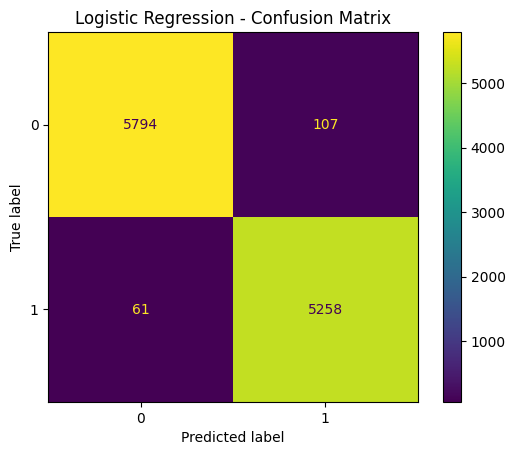

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print("\n🧾 Classification Report:")
print(classification_report(y_test, pred_lr, target_names=["Fake", "True"]))

print("📊 Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(xv_train, y_train)

DecisionTreeClassifier()


🧾 Classification Report:
0.9955436720142602
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5901
           1       1.00      1.00      1.00      5319

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

📊 Confusion Matrix:


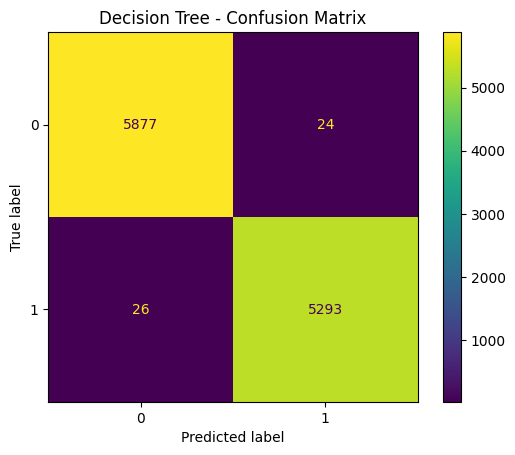

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print("\n🧾 Classification Report:")

pred_dt= DT.predict(xv_test)
print(DT.score(xv_test, y_test))
print(classification_report(y_test, pred_dt))
print("📊 Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
predict_gb=GBC.predict(xv_test)
print(GBC.score(xv_test, y_test))

0.9957219251336898



🧾 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5901
           1       0.99      1.00      1.00      5319

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

📊 Confusion Matrix:


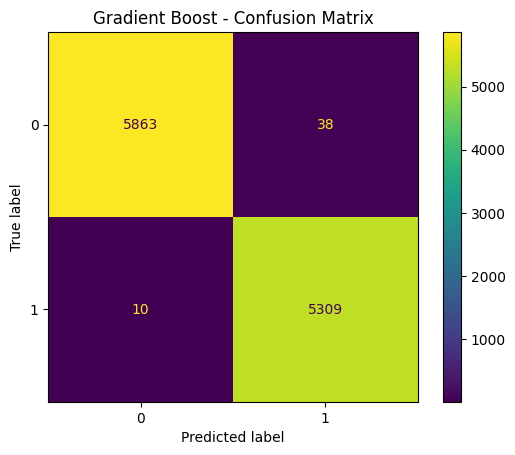

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print("\n🧾 Classification Report:")
print(classification_report(y_test, predict_gb))

print("📊 Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, predict_gb)
plt.title("Gradient Boost - Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

0.9899286987522281

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5901
           1       0.99      0.99      0.99      5319

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

📊 Confusion Matrix:


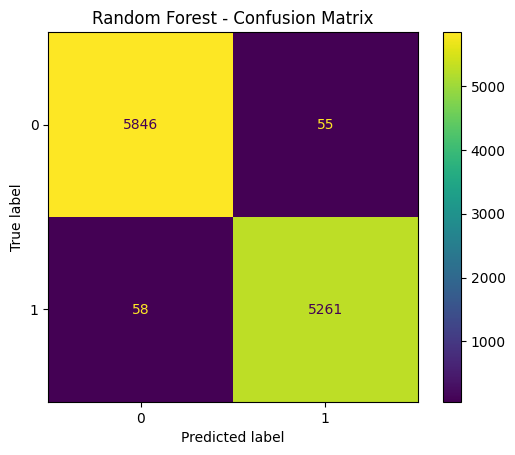

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

predict_rf=RF.predict(xv_test)
print(RF.score(xv_test, y_test))
print("\n🧾 Classification Report:")
print(classification_report(y_test, predict_rf))

print("📊 Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, predict_rf)
plt.title("Random Forest - Confusion Matrix")
plt.show()

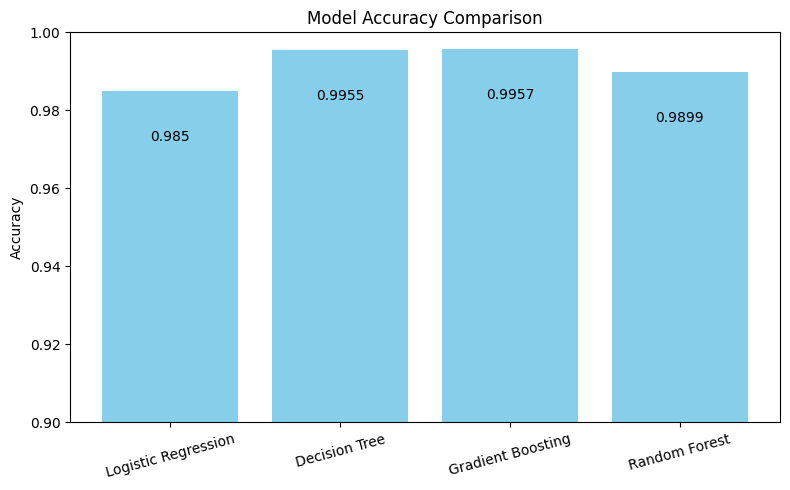

In [79]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracies = [
    LR.score(xv_test, y_test),
    DT.score(xv_test, y_test),
    GBC.score(xv_test, y_test),
    RF.score(xv_test, y_test)
]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim(0.9, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - 0.01, round(yval, 4), ha='center', va='top')
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png")
plt.show()


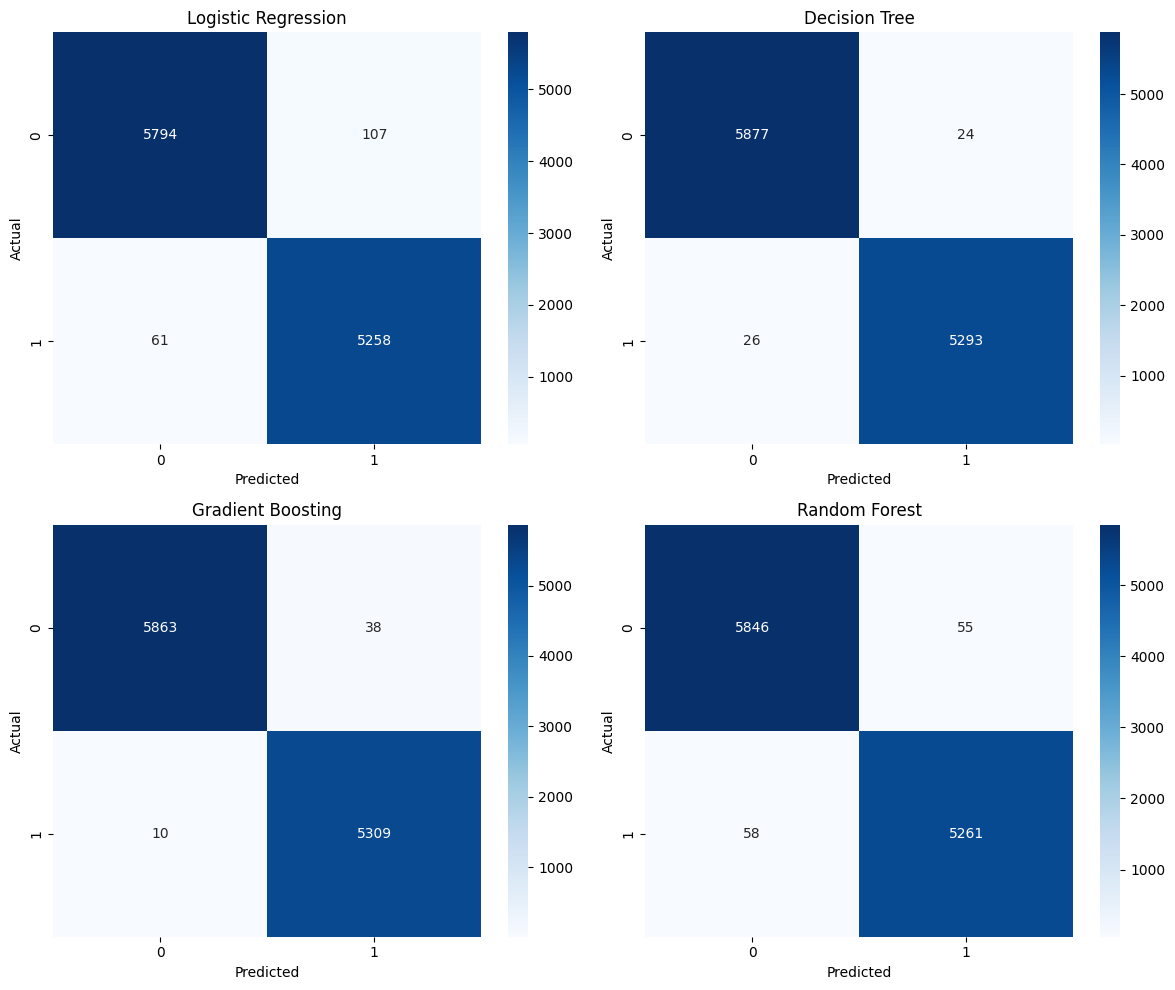

In [78]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
models = {
    "Logistic Regression": pred_lr,
    "Decision Tree": pred_dt,
    "Gradient Boosting": predict_gb,
    "Random Forest": predict_rf
}
axes = axes.flatten()

for i, (model_name, predictions) in enumerate(models.items()):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.savefig("all_conf_matrices_heatmap.png")
plt.show()


In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news= {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = DT.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_lable(pred_LR[0]),
                                                                output_lable(pred_DT[0]),output_lable(pred_GB[0]),output_lable(pred_RF[0])))


In [80]:
news=str(input())
manual_testing(news)

"Aliens Sign Peace Treaty With Earth’s Leaders in Secret Antarctica Summit"  In a classified event hidden from the public eye, world leaders and representatives from an advanced alien civilization reportedly met in Antarctica to sign a mutual non-aggression and knowledge-sharing pact. Sources claim that the extraterrestrials, who call themselves the "Zylogians," arrived in cloaked spacecraft and demonstrated technology far beyond human understanding. While no official confirmation has been made, leaked documents and eyewitness accounts suggest that intergalactic diplomacy is now a reality.


LR Prediction: Fake News 
DT Prediction: Fake News 
GB Prediction: Fake News 
RF Prediction: Fake News
